# Unit 2 - Applied PCA
In this practical you will learn:
* Python idioms for 
 * plotting with matplotlib,
 * array addressing with numpy,
* The general scikit-learn workflow
* Performing PCA with scikit-learn
* Essential Data analysis with PCA and scikit-learn

# 1. Python idioms used in this practical
We will start with a refresher of Python idioms that we use in this practical. You can skip this if you feel you are already deeply familiar with the concepts presented. Feel free to come back to this section in case any code is unclear. 

## 1.1 matplotlib idioms

### plotting with ax.plot(...)
Internally, matplotlib uses an `Axes` object to plot the data in. All plotting can be done via methods of this object. to This object has all the methods one needs for plotting. In addition, it allows to adjust the plot appearance, add labels, etc.

Therefore it is often practical to plot via the `Axes` object rather than using e.g. `plt.plot(...)`

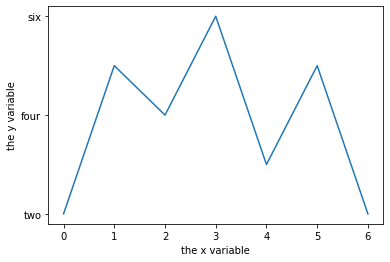

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.gca() #obtains the Axes object
ax.plot([2,5,4,6,3,5,2])

#decorate the plot; set axis labels 
t = ax.set_xlabel('the x variable')
t = ax.set_ylabel('the y variable')

#manually set ticks on the y-axis
t = ax.set_yticks([2,4,6])

# manually set labels
t =  ax.set_yticklabels(['two', 'four', 'six'])

Matplotlib can display square matrices as images via the `imshow` function. A `colorbar` alongside the figure acts as a kind of 'legend' that allows to guess numerical values from the colours. 

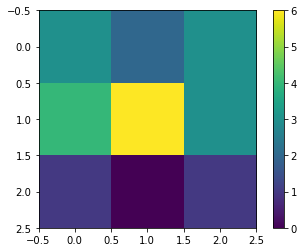

In [2]:
import numpy as np
ax = plt.gca()
matrix = np.array([[3,2,3],
                   [4,6,3],
                   [1,0,1]])
img = ax.imshow(matrix)
c = plt.colorbar(img) #note that this needs to be done via `plt`, not `ax`

## 1.2 numpy idioms
This is essential numpy you will need. Let's use a [Pascal matrix](https://en.wikipedia.org/wiki/Pascal_matrix) as an example: 

In [3]:
from scipy.linalg import pascal

#make pascal matrix, 5 rows, 5 columns
p = pascal(5)
p

array([[ 1,  1,  1,  1,  1],
       [ 1,  2,  3,  4,  5],
       [ 1,  3,  6, 10, 15],
       [ 1,  4, 10, 20, 35],
       [ 1,  5, 15, 35, 70]], dtype=uint64)

### mean, standard deviation, variance in arrays and matrices
You can compute mean, standard deviation and variance with numpy via `mean`, `std` and `var`. Normally these 'flatten' the array and return only one number:

In [4]:
np.mean(p)

10.04

But you can compute them separately for each column...

In [5]:
np.mean(p, axis=0)

array([ 1. ,  3. ,  7. , 14. , 25.2])

... or for each row:

In [6]:
np.mean(p, axis=1)

array([ 1. ,  3. ,  7. , 14. , 25.2])

We mostly compute them separately for each column, as we are interested in mean and variance of features.

In [7]:
np.std(p, axis=0)

array([ 0.        ,  1.41421356,  5.01996016, 12.34503949, 25.30138336])

In [8]:
np.var(p, axis=0)

array([  0.  ,   2.  ,  25.2 , 152.4 , 640.16])

### Slicing via the `:` operator 
Quite often we will only want to use parts of an array. This is accomplished by 'slicing' via the `:` operator. By itself, it selects all values in one dimension:

In [9]:
p[2,:] # all columns in row two. counting starts at zero!

array([ 1,  3,  6, 10, 15], dtype=uint64)

In [10]:
p[:,1] # all rows in column 1. 

array([1, 2, 3, 4, 5], dtype=uint64)

Notice that a column is selected, but the resulting array is printed as a row!

The `:` operator can be used to select ranges of data:

In [11]:
p[2:4, 3:5] # data in rows 2 and 3, and columns 3 and 4 

array([[10, 15],
       [20, 35]], dtype=uint64)

### array indexing with booleans
You can apply a criterion to a range of values and use the resulting boolean array to address the columns and rows. 

For example, lets check which columns have variance larger than 8.0:

In [12]:
cols = np.var(p, axis=0) > 8.0
cols

array([False, False,  True,  True,  True])

We can use this to select those columns from the array:

In [13]:
p[:, cols]

array([[ 1,  1,  1],
       [ 3,  4,  5],
       [ 6, 10, 15],
       [10, 20, 35],
       [15, 35, 70]], dtype=uint64)

Of course array contents can be addressed with numerical indices, too:

In [14]:
p[:, [2,3,4]] #selects columns 2,3,4 

array([[ 1,  1,  1],
       [ 3,  4,  5],
       [ 6, 10, 15],
       [10, 20, 35],
       [15, 35, 70]], dtype=uint64)

### boolean arithmetics for indexing
Boolean index arrays can be combined using boolean arithmetics. For example, consider the following array:

In [15]:
a = np.array([3,7,5,8,6,2,1,9,4,5,7,8,2,3,6,4,7,8,3,4,5])

Lets place a criterion that values should be greater than 3:

In [16]:
gt3 = a > 3
gt3

array([False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True])

In addition, values should be smaller than 8:

In [17]:
lt8 = a < 8
lt8

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True])

Finally, let's combine those two criteria using the boolean 'and':

In [18]:
crit = np.logical_and(lt8,gt3)
crit

array([False,  True,  True, False,  True, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True,  True])

... and we can finally select those values from the array which are greater than 3 and less than 8:

In [19]:
a[crit]

array([7, 5, 6, 4, 5, 7, 6, 4, 7, 4, 5])

## 1.3 sklearn general workflow
Scikit-learn provides machine learning algorithms, called *estimators*, and transformers and preprocessors (like to normalise data.  All of these support a `fit` and a `transform` method. 
* `fit` 'trains' the machine learning model, or extracts the parameters for the preprocessor.
* `transform` applies the learnt model or parameterised preprocessing to the data.
    
For example, the `StandardScaler` that scales a features matrix to zero mean and unit variance.

Let's look at the pascal matrix as an example again, this time using the "upper triangular' form:

In [20]:
p = pascal(3, 'upper', exact=False) 
#exact=False creates a floating point instead of an int array
#avoids an error message further down.

print('before scaling:')
print(p)
print('per-column mean:')
print('{}'.format(np.mean(p, axis=0)))
print('per-column variance:')
print('{}'.format(np.var(p, axis=0)))

before scaling:
[[1. 1. 1.]
 [0. 1. 2.]
 [0. 0. 1.]]
per-column mean:
[0.33333333 0.66666667 1.33333333]
per-column variance:
[0.22222222 0.22222222 0.22222222]


Now we use `StandardScaler` to scale the matrix:

In [21]:
from sklearn import preprocessing as pp
# sklearn standard scaler in action
scaler = pp.StandardScaler()
scaler.fit(p) # 'learns' mean and variance of a
p_dash = scaler.transform(p) # 'transforms' a

print()
print('after scaling:')
print(p_dash)
print('per-column mean:')
print('{}'.format(np.mean(p_dash, axis=0)))
print('per-column variance:')
print('{}'.format(np.var(p_dash, axis=0)))


after scaling:
[[ 1.41421356  0.70710678 -0.70710678]
 [-0.70710678  0.70710678  1.41421356]
 [-0.70710678 -1.41421356 -0.70710678]]
per-column mean:
[7.40148683e-17 7.40148683e-17 1.48029737e-16]
per-column variance:
[1. 1. 1.]


Note how the normalised mean is vanishingly small. 

# 2. PCA essentials 

Let's do a PCA on an anisotropic gaussian blob of data points. 

First we make the data and plot it. We use the `multivariate_normal` function of nupy that generates a gaussian blob with a given covariance matrix - very convenient!

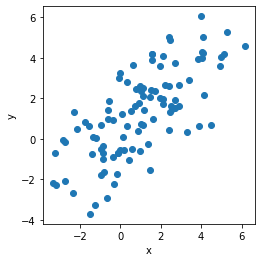

In [22]:
design_covmat = np.array([[5.,4.],
                          [4.,6.]]) #the covariance matrix
center = np.array([1,1.5]) # the center of the blob
blob = np.random.multivariate_normal(mean=center, 
                                     cov=design_covmat, 
                                     size=100)

#plotting
ax = plt.gca()
ax.scatter(blob[:,0], blob[:,1])
ax.axis('scaled')
t = ax.set_xlabel('x')
t = ax.set_ylabel('y')

Next step: do a PCA with scikit-learn.

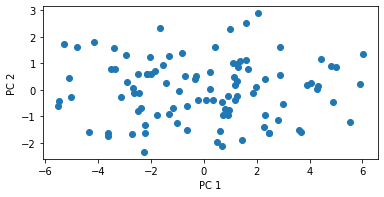

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(blob)
blob_pca = pca.transform(blob)

#plotting
ax = plt.gca()
ax.scatter(blob_pca[:,0], blob_pca[:,1])
ax.axis('scaled')
t = ax.set_xlabel('PC 1')
t = ax.set_ylabel('PC 2')

Notice two things:
1. the center of the blob is now at the origin ([0.,0.])
2. the first component (i.e. x-axis) is aligned in the direction of highest variance. 

### Covariance matrix from PCA
The PCA implementation in scikit-learn gives us access to the covariance matrix. Let's compare it to the covariance matrix that we used to make the blobs:

In [24]:
computed_covmat = pca.get_covariance()
print("covmat from PCA:")
print("{}".format(computed_covmat))
print()
print("design covmat:")
print("{}".format(design_covmat))

covmat from PCA:
[[4.55718717 3.27308729]
 [3.27308729 4.61393565]]

design covmat:
[[5. 4.]
 [4. 6.]]


**Question:**
* Are the design and the computed covariance matrices identical? 
* Answer: No, They are not indentical now.



* If not, why? What does it mean for using PCA in applied data analysis?
* Answer: Because we find a non-trivial linear combination of our original variables in computed covariance matrics non-diagonally and now our resulting varaibles are uncorrelated.
  PCA forms the basis of multivariate data analysis based on projection methods. The most important use of PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers.PCA is a very flexible tool and allows analysis of datasets that may contain, for example, multicollinearity, missing values, categorical data, and imprecise measurements.

**Task**
* Increase the number of points in the blob from 100 to 10000. Repeat the analysis. How large is the difference between the observed and design covariance matrix now? Can you explain the difference to the previous example with the 100 points in the blob?

#### Solution

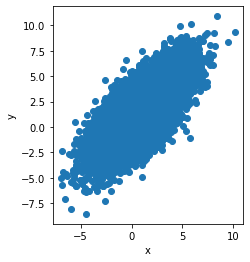

In [25]:
Newdesign_covmat = np.array([[5.,4.],
                          [4.,6.]]) #the covariance matrix
center = np.array([1,1.5]) # the center of the blob

#Increasing the number of points in the blob from 100 to 10000

blob1 = np.random.multivariate_normal(mean=center, 
                                     cov=Newdesign_covmat, 
                                     size=10000)

#plotting
ax = plt.gca()
ax.scatter(blob1[:,0], blob1[:,1])
ax.axis('scaled')
t = ax.set_xlabel('x')
t = ax.set_ylabel('y')

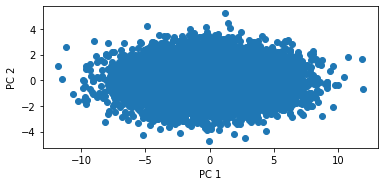

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(blob1)
blob_pca1 = pca.transform(blob1)

#plotting
ax = plt.gca()
ax.scatter(blob_pca1[:,0], blob_pca1[:,1])
ax.axis('scaled')
t = ax.set_xlabel('PC 1')
t = ax.set_ylabel('PC 2')

In [27]:
computed_covmat = pca.get_covariance()
print("covmat from PCA:")
print("{}".format(computed_covmat))
print()
print("design covmat:")
print("{}".format(Newdesign_covmat))

covmat from PCA:
[[4.96363075 3.98018866]
 [3.98018866 5.96815371]]

design covmat:
[[5. 4.]
 [4. 6.]]


When the size of points increases from 100 to 10000 the data got thickly populated. but after the PCA, the center of the blob is still at the origin ([0.,0.]) also the first component (i.e. x-axis) is aligned in the direction of highest variance. The main difference is with more number of points the direction of varaince increased diagonally.

## 2.1 PCA on iris

We're just warming up so let's reproduce the Iris analysis from the lecture. 

We start by loading the iris data set, which is conveniently contained in scikit-learn:

In [28]:
import sklearn.datasets as data
iris = data.load_iris()

The result is a data structure, in the form of a dictionary. let's explore it:

In [29]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

The names of the keys are pretty much self-explanatory. Have a look at the `DESCR` key for more information about the data set:

In [30]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We can construct a pandas data frame from that information:

In [31]:
import pandas as pd
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### **Task for advanced students:**
Construct the data frame such that the "species" column has the actual species names (setosa etc).

In [32]:
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris_df['species']],
                  columns= iris['feature_names'] + ['species']).astype({'species': int}) \
       .assign(species=lambda x: x['species'].map(dict(enumerate(iris['target_names']))))

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### PCA on iris

We can essentially use the same approach when out data is in a data frame, we just have to get it out:

In [33]:
iris_values = iris_df[iris['feature_names']].values
iris_values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

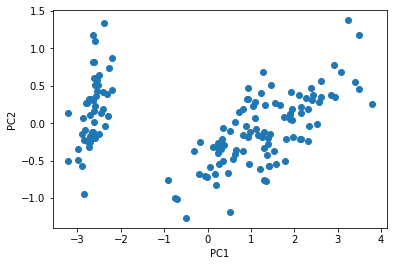

In [34]:
pca = PCA()
pca.fit(iris_values)
iris_pca = pca.transform(iris_values)

#plotting
ax = plt.gca()
ax.scatter(iris_pca[:,0], iris_pca[:,1])
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

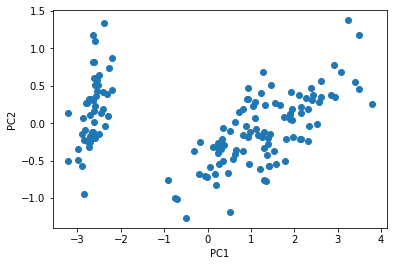

In [35]:
pca = PCA()
pca.fit(iris_values)
iris_pca = pca.transform(iris_values)

#plotting
ax = plt.gca()
ax.scatter(iris_pca[:,0], iris_pca[:,1])
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

**Task (for advanced students):** color the dots according to species.

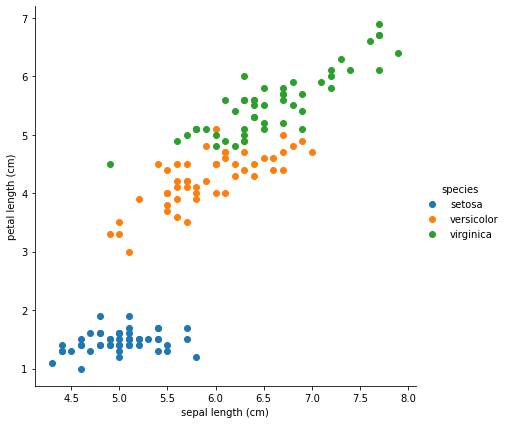

In [36]:
import seaborn as sns

sns.FacetGrid(iris_df, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()

### covariance matrix
Let's plot the covariance matrix as numbers:

In [37]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

Now let's plot the covariance matrix as an image:

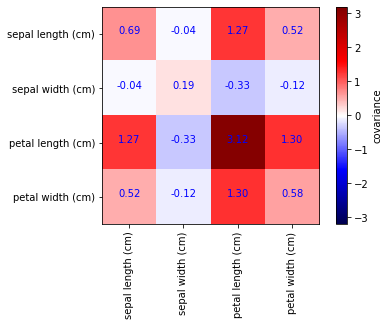

In [38]:
ax = plt.gca()
covmat = pca.get_covariance()
img = ax.imshow(covmat, cmap='seismic', vmin=-3.2, vmax=3.2)
plt.colorbar(img, label='covariance')
ax.set_yticks([0,1,2,3])
t = ax.set_yticklabels(iris['feature_names'])
ax.set_xticks([0,1,2,3])
t = ax.set_xticklabels(iris['feature_names'], rotation=90)
for x in range(4):
    for y in range(4):
        ax.text(x,y,"{:.2f}".format(covmat[y,x]), {'ha':'center', 'color':"blue"})

In the practicals to follow, we will often visualise matrices as "images", with a colorbar that reveals the numerical value. Usually we will not plot the actual values, resulting in such a plot:

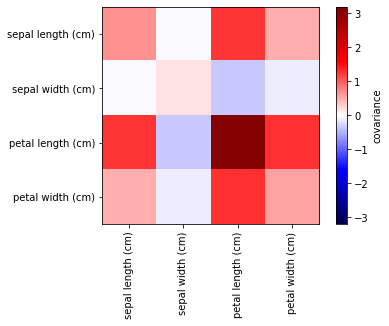

In [39]:
ax = plt.gca()
img = ax.imshow(covmat, cmap='seismic', vmin=-3.2, vmax=3.2)
plt.colorbar(img, label='covariance')
ax.set_yticks([0,1,2,3])
ax.set_yticks([0,1,2,3])
t = ax.set_yticklabels(iris['feature_names'])
ax.set_xticks([0,1,2,3])
t = ax.set_xticklabels(iris['feature_names'], rotation=90)

### Scree plot
The scree plot displays the amount of explained variance.

[Text(0, 0, 'PC0'), Text(1, 0, 'PC1'), Text(2, 0, 'PC2'), Text(3, 0, 'PC3')]

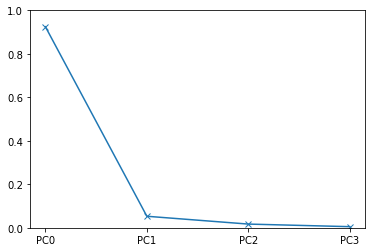

In [40]:
ax = plt.gca()
expl_var = pca.explained_variance_ratio_
ax.plot(expl_var, marker='x')
ax.set_ylim(0,1.)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["PC{}".format(i) for i in range(4)])

### Components
The principal components are a weighted sum of the data vectors. Let's retrieve them from the PCA:

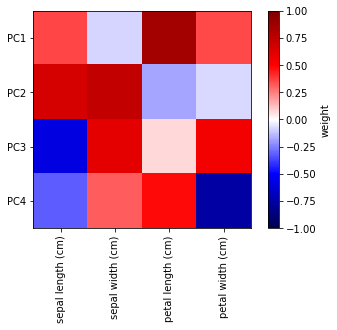

In [41]:
comps = pca.components_
ax = plt.gca()
img = ax.imshow(comps, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(img, label="weight")
ax.set_yticks([0,1,2,3])
t = ax.set_yticklabels(["PC{}".format(i+1) for i in range(4)])
ax.set_xticks([0,1,2,3])
t = ax.set_xticklabels(iris['feature_names'], rotation=90)

**Task**: Which features have a positive weight on PC1?

Sepal Length (cm), Petal Length (cm),and, Petal Width (cm) have positive weights on PC1.

### Normalisation
Finally, let's normalise the data and do the PCA again:

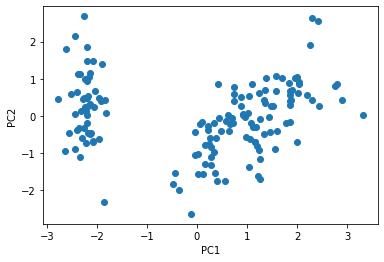

In [42]:
ss = pp.StandardScaler()
ss.fit(iris_values)
pca_norm = PCA()
pca_norm.fit(ss.transform(iris_values)) # note the composition of the commands
iris_pca_norm = pca_norm.transform(ss.transform(iris_values))

#plotting
ax = plt.gca()
ax.scatter(iris_pca_norm[:,0], iris_pca_norm[:,1])
t = ax.set_xlabel('PC1')
t = ax.set_ylabel('PC2')

The difference in result is subtle in the plot of the first two PCs, but it is more drastic in the covariance matrix.

### Task (all students):
1. plot the covariance matrix for the normalised data and compare it to that of the raw data.
2. plot the scree-plot for the normalised data and compare it to that of the raw data. 
3. Observe the difference! Compare to the lecture, where we discussed the "variance bug" of PCA.



covariance matrix for the normalised data:


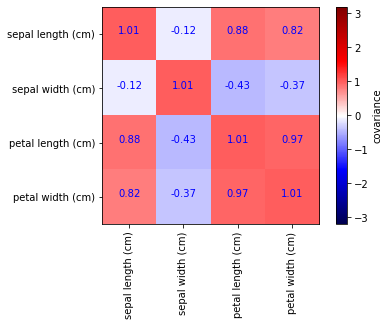

In [43]:
print("covariance matrix for the normalised data:")
ax = plt.gca()
covmat = pca_norm.get_covariance()
img = ax.imshow(covmat, cmap='seismic', vmin=-3.2, vmax=3.2)
plt.colorbar(img, label='covariance')
ax.set_yticks([0,1,2,3])
t = ax.set_yticklabels(iris['feature_names'])
ax.set_xticks([0,1,2,3])
t = ax.set_xticklabels(iris['feature_names'], rotation=90)
for x in range(4):
    for y in range(4):
        ax.text(x,y,"{:.2f}".format(covmat[y,x]), {'ha':'center', 'color':"blue"})

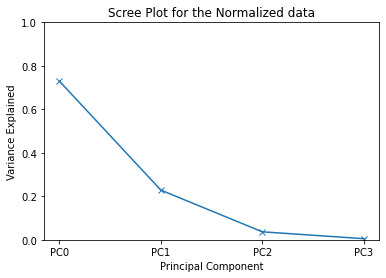

In [47]:
ax = plt.gca()
expl_var = pca_norm.explained_variance_ratio_
ax.plot(expl_var, marker='x')
ax.set_ylim(0,1.)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["PC{}".format(i) for i in range(4)])
plt.title('Scree Plot for the Normalized data')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [55]:
print ("Varaince from Raw Data:",np.var(iris_pca))
print ("Varaiance from Normalized data:",np.var(iris_pca_norm))

Varaince from Raw Data: 1.135617666666667
Varaiance from Normalized data: 1.0


The Covariance matrix of raw iris data was skewed and misinterpreted. Now the Data is normalized, the Varaince level is low and Results are Interpreted successfully.  

# Conclusion
* PCA is a powerful tool to get a first glance at data. 
* Normalisation can make a huge difference.
* Dimensionality reduction helps with plotting.
* Scree plot allows to identify how many components are required.
* Component loadings allow interpretation of feature relevance.
* Identifying clusters can help uncover patterns in instances and features. 